# Self-Organizing Maps of Clothing Item Images

This is an exercise that explores the image association and visualization power of the Self-Organizing Map (SOM) algorithm. SOMs are useful for visualizing the relationships between data points in multidimensional space because they reduce dimensionality while preserving the topological structure. As an unsupervised learning algorithm, SOMs are well-suited for identifying clusters of similar data points without the need for labels.

Here, I will apply the scikit-learn package for SOMs to the MNIST fashion dataset, which contains images of clothing (shown below) to reduce its dimensionality from 784 features to 2. This will create a map of the dataset where we should see similar clothing items clustered together. Although the labels in the dataset are not necessary to create the map, they are applied to show the clusters more explicitly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn_som.som import SOM
import pickle

## Importing and Inspecting the Data
This MNIST Fashion dataset is a subset of a larger set available from NIST. The images have been size-normalized and centered into a fixed-size image of 28x28 pizels. The images contained in the data set consist of ten categories of clothing items labeled as such:

- 0: T-shirt/top
- 1: Trouser
- 2: Pullover
- 3: Dress
- 4: Coat
- 5: Sandal
- 6: Shirt
- 7: Sneaker
- 8: Bag
- 9: Ankle boot

I will start by importing the data and inspecting it

In [2]:
# import the fashion MNIST data and explore it
data = pd.read_csv("mnist_fashion.csv")
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


So we see that the data is made of 10,000 data points, each structured as an array of 784 dimensions and 1 label. Each of the 784 dimensions represents a pixel value of a 28x28 pixel image. Let's split the data to separate the labels from the features, then separate them into training and testing data.

In [3]:
# assign all but first column of 9000 data points to training data set
train = data[data.columns[1:]][:9000]
# save training data as csv file
train.to_csv('train.csv', index=False)
# convert to numpy array
train = np.array(train)
# assign all but furst column of 9000 data points to test data set
test = data[data.columns[1:]][9000:]
# save training data as csv file
test.to_csv('test.csv', index=False)
# convert to numpy array
test = np.array(test)
# assign last column of 9000 data points to training target data set
train_target = np.array(data[data.columns[0]][:9000])
# assign last column of 9000 data points to testing target data set
test_target = np.array(data[data.columns[0]][9000:])
print("Training data set length:", len(train))
print("Testing data set length:", len(test))
print("Training target data set length:", len(train_target))
print("Testing target data set length:", len(test_target))

Training data set length: 9000
Testing data set length: 1000
Training target data set length: 9000
Testing target data set length: 1000


I will also define an array with each index corresponding to the labels represented by the index numbers.

In [4]:
target_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Now let's visualize the first image of each clothing type, to see what we're actually working with.

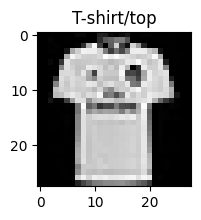

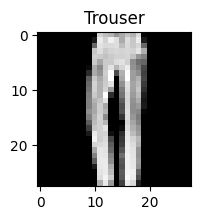

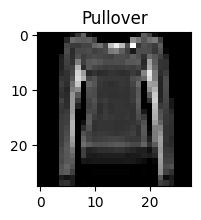

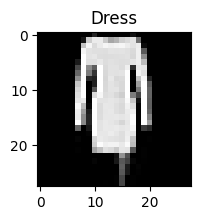

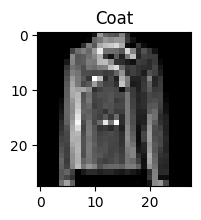

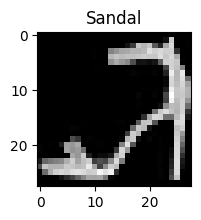

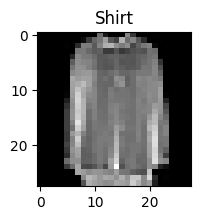

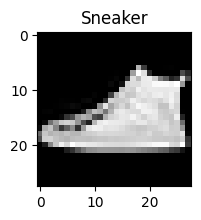

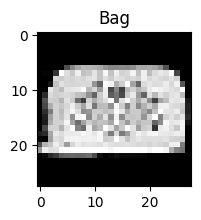

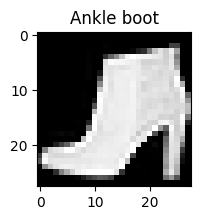

In [5]:
for i in range(10):
    display = train[train_target == i][0].reshape(28, 28)
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.imshow(display, cmap='gray')
    plt.title(target_labels[i])
    plt.show()

## Creating the SOM
Now that we understand the data, let's create the SOM

In [6]:
# initiate a 10x10 map with input dimensions = 784
fashion_som = SOM(m=10, n=10, dim=784)
fashion_som.fit(train)

In [7]:
# transform the map to organize the training data
fashion_map = fashion_som.transform(train)

In [8]:
# find the closest node for each data point
fashion_prediction = fashion_som.predict(train)
# save predictions to csv file
pd.DataFrame(fashion_prediction).to_csv('fashion_prediction.csv', index=False)

## Visualizing the SOM
Now that the map is constructed in 2D space, we will want to visualize it. To do that, we need to see what kind of data is closest to each node. First, let's inspect each node and assign a label to it based on the most common type of image closest to that node. This will give us an idea of how the map is clustered. To plot the map, I will color-code each label. We should expect to the colors creating different regions on the map.

In [9]:
# find the most common target values for each node
class_labels = []
for i in range(100):
    som_predicition_list = {}
    # if a node has no closest images, assign an 11th label
    if len(train_target[fashion_prediction == i]) == 0:
        class_labels.append(10)
        continue
    for j in train_target[fashion_prediction == i]:
        if j not in som_predicition_list:
            som_predicition_list[j] = 0
        som_predicition_list[j] += 1
    # assign the predicted label by finding the mode of the predicted values
    class_labels.append(int(max(som_predicition_list, key=som_predicition_list.get)))

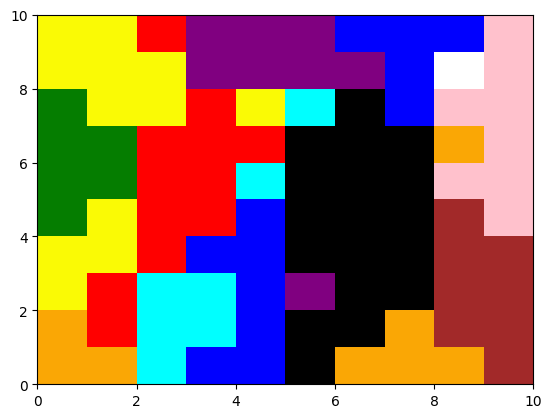

In [10]:
# create grid coordinates and colors to represent each of the 10 labels
# nodes with no matching images are represented as white
x, y = np.meshgrid(np.arange(11), np.arange(11))
z = np.array(class_labels).reshape(10, 10)
custom_colors = ['red', 'green', 'blue', 'yellow',
                 'purple', 'orange', 'cyan', 'brown',
                 'black', 'pink']
# if an empty node exists, color it white
if 10 in class_labels:
    custom_colors.append('white')

# assign the colors to the predicted labels and plot
fig, ax = plt.subplots()
cmap = colors.LinearSegmentedColormap.from_list("", custom_colors)
ax.pcolormesh(x, y, np.flipud(z), cmap=cmap)

The clothing items are represented in the map by colors from the custom color map in order:

- Red: T-shirt/top
- Green: Trouser
- Blue: Pullover
- Yellow: Dress
- Purple: Coat
- Orange: Sandal
- Cyan: Shirt
- Brown: Sneaker
- Black: Bag
- Pink: Ankle boot

For a more intuitive visualization of these categories, let's inspect the images assigned to each node and take an average of the images by pixel value. Then we can create a grid similar to the one above, but with visual representations of the data at each node.

In [11]:
# for each node, create an average of all the images closest to it
node_image = []
for i in range(100):
    # create a node image variable for each node
    node_image.append([0]*len(train[0]))
    # find all images closest to the node
    for img in train[fashion_prediction == i]:
        # add each pixel of each image together
        for j, pixel in enumerate(img):
            node_image[i][j] += pixel
    # skip empty nodes
    if not len(train[fashion_prediction == i]):
        node_image[i] = np.array(node_image[i])
        continue
    # average out each pixel and make image a NumPy array
    node_image[i] = np.array(node_image[i]) / len(train[fashion_prediction == i])

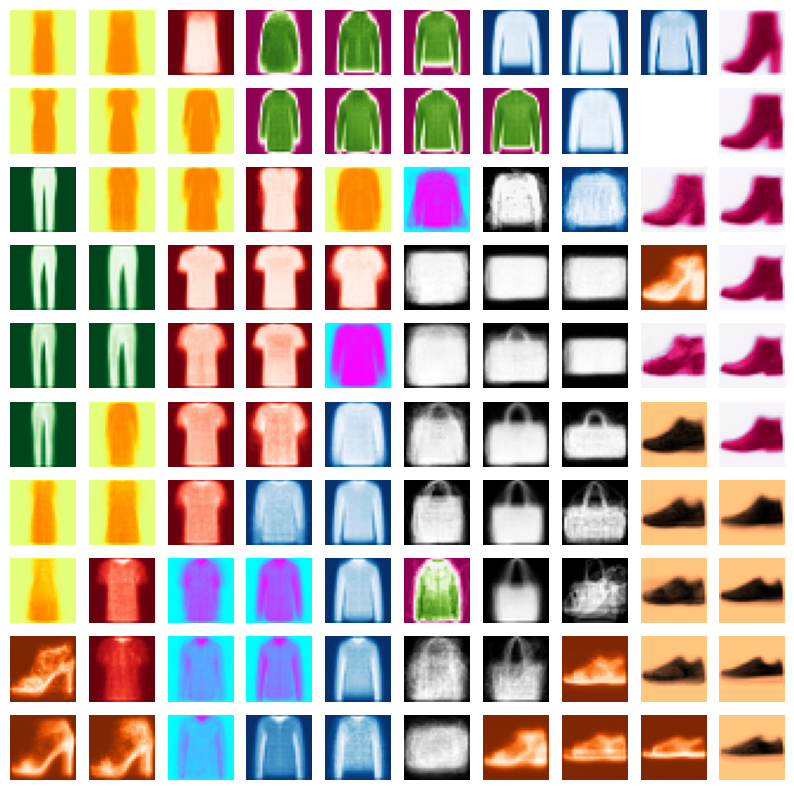

In [12]:
# redefine colors to the most similar cmap gradients
gradient_colors = ['Reds_r', 'Greens_r', 'Blues_r', 'Wistia',
                 'PiYG', 'Oranges_r', 'cool', 'copper_r',
                 'Grays_r', 'PuRd', 'Grays']

plt.figure(figsize=(10,10))
# plot average images for each of the 100 nodes
for i in range(100):
    plt.subplot(10,10,i+1)  # 100 images in a 10x10 grid
    plt.imshow(node_image[i].reshape(28, 28), cmap=gradient_colors[z.reshape(100)[i]])
    plt.axis('off')

plt.show()

The clothing items are represented in the map by colors from the custom color map in order:

- Red/white: T-shirt/top
- Green/white: Trouser
- Blue/white: Pullover
- Yellow: Dress
- Purple/green: Coat
- Orange/white: Sandal
- Cyan/magenta: Shirt
- Brown/black: Sneaker
- Black/white: Bag
- Pink: Ankle boot
- White: Empty cells

## Measuring the Accuracy of Assigned Labels

Since we assigned labels for each class created by the SOM, we can measure the accuracy of the labels by comparing the class assigned to each data point (and associated label) to their actual labels. We'll start by assessing how accurately the test data is represented.

In [13]:
count = 0
for i in range(len(fashion_prediction)):
    if int(train_target[i]) == class_labels[fashion_prediction[i]]:
        count += 1
print("{}% of training data accurately represented".format(count*100 / len(fashion_prediction)))

72.37777777777778% of training data accurately represented


Now we will use the test data to assess how accurately we can predict labels of the clothing items using this map.

In [14]:
# make predictions on test data
fashion_som_prediction_test = fashion_som.predict(test)

# count accurate predictions
count = 0
for i in range(len(fashion_som_prediction_test)):
    if int(test_target[i]) == class_labels[fashion_som_prediction_test[i]]:
        count += 1
print("{}% of test data accurately represented".format(count*100 / len(fashion_som_prediction_test)))

72.4% of test data accurately represented


This shows that we are able to make fairly accurate label predictions for the images of clothing items. More importantly, SOMs organize data by similarity, so for any image in the dataset, we can find its location on the map and inspect the closest node for similar images. This can be useful with applications like online shopping, where a vendor may want to retrieve items similar to an image uploaded by a customer.

## Saving the Model

Now I'll save the model to use with a python program

In [15]:
# Save Model Using Pickle
with open("model.pkl", "wb") as model_file:
    pickle.dump(fashion_som, model_file)